In [1]:
import numpy as np
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import scipy.io
from matplotlib.pyplot import imread
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pyCompare as pc

In [2]:
#images for min and max
gt_img = cv2.imread(".\\ranking-images\\samplegt.png")
gt_img_bw = cv2.imread(".\\ranking-images\\samplegt.png",0)

seg_img = cv2.imread(".\\ranking-images\\noseg.png")
seg_img_bw = cv2.imread(".\\ranking-images\\noseg.png",0)

# Spatial Overlap Based

In [3]:
#Jaccard Index
from sklearn.metrics import jaccard_score

#F-measure
from sklearn.metrics import f1_score

#Global Consistency error - TO DO
#sklearn.metrics.multilabel_confusion_matrix

In [4]:
#Jaccard Index Max and Min
jacc_max = f1_score(gt_img.flatten(),gt_img.flatten(), average='weighted', labels = [64, 136, 243])
print("Max: ",jacc_max)
jacc_min = f1_score(gt_img.flatten(),seg_img.flatten(), average='weighted', labels = [64, 136, 243])
print("Min: ",jacc_min)

Max:  1.0
Min:  0.0


In [5]:
#F-measure Max and Min
f_max = jaccard_score(gt_img.flatten(),gt_img.flatten(), average='weighted', labels = [64, 136, 243])
print("Max: ",f_max)
f_min = jaccard_score(gt_img.flatten(),seg_img.flatten(), average='weighted', labels = [64, 136, 243])
print("Min: ",f_min)

Max:  1.0
Min:  0.0


# Pair Counting Based

In [6]:
#Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score

In [7]:
#Adjusted Rand Index Max and Min
adj_max = adjusted_rand_score(gt_img_bw.flatten(), gt_img_bw.flatten())
print("Max: ",adj_max)
adj_min = adjusted_rand_score(gt_img_bw.flatten(), seg_img_bw.flatten())
print("Min: ",adj_min)

Max:  1.0
Min:  0.0


# Information Theoretic Based

In [8]:
#Mutual Information
from sklearn.metrics import mutual_info_score

In [9]:
#Mutual Information Max and Min
mi_max = mutual_info_score(gt_img_bw.flatten(), gt_img_bw.flatten())
print("Max: ",mi_max)
mi_min = mutual_info_score(gt_img_bw.flatten(), seg_img_bw.flatten())
print("Min: ",mi_min)

Max:  0.3817632085639158
Min:  1.6930901125533637e-15


# Probabilistic Based

In [10]:
#Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

In [11]:
#Cohen's Kappa Max and Min
kappa_max = cohen_kappa_score(gt_img_bw.flatten(), gt_img_bw.flatten(), labels=[64, 136, 243])
print("Max: ",kappa_max)
#kappa_min = cohen_kappa_score(gt_img_bw.flatten(), seg_img_bw.flatten(), labels=[64, 136, 243])
#print("Min: ",kappa_min) # Division by 0

Max:  1.0


# Spatial Distance Based

In [12]:
#Hausdorff distance
from scipy.spatial.distance import directed_hausdorff

In [13]:
#Hausdorff distance Max and Min
haus_max = directed_hausdorff(gt_img_bw,gt_img_bw)[0]
print("Max: ",haus_max)
haus_min = max(directed_hausdorff(seg_img_bw,gt_img_bw)[0],directed_hausdorff(gt_img_bw,seg_img_bw)[0])
print("Min: ",haus_min)

Max:  0.0
Min:  2144.076257972183


# Performance Based

In [14]:
def mse(img1,img2):
    img1 = img1.astype(np.float64) / 255.
    img2 = img2.astype(np.float64) / 255.
    result = np.mean((img1 - img2) ** 2)
    return result

def mae(img1,img2):
    result = np.sum(np.absolute(img2.astype(np.float64) - img1.astype(np.float64)))
    result /= float(img1.shape[0] * img1.shape[1] * 255)
    if result < 0:
        return result * -1
    else:
        return result

In [15]:
#MAE
mae_max = mae(gt_img, gt_img)
print("Max: ",mae_max)
mae_min = mae(gt_img, seg_img)
print("Min: ",mae_min)

Max:  0.0
Min:  0.10470691636029411


In [16]:
#MSE
mse_max = mse(gt_img, gt_img)
print("Max: ",mse_max)
mse_min = mse(gt_img, seg_img)
print("Min: ",mse_min)

Max:  0.0
Min:  0.017005094645088432


In [17]:
#PSNR
psnr_max = cv2.PSNR(gt_img, gt_img)
print("Max: ",psnr_max)
psnr_min = cv2.PSNR(gt_img, seg_img)
print("Min: ",psnr_min)

Max:  361.20199909921956
Min:  17.694209465759954


# Rankings

In [18]:
r1 = np.array([3,3,4,4,4,3,3,3,3,3,3,4,3,4,3,3,4,3,3,3,4,3])
r2 = np.array([3,3,3,4,4,3,3,3,3,3,4,4,4,4,3,3,4,3,3,3,4,3])

In [19]:
#normalized rankings
norm_r1 = (r1-1) /(5-1)
norm_r2 = (r2-1) /(5-1)

# Normalized Metrics

In [20]:
#File Directories
gt_files = os.listdir('.\\ranking-images\\gt')
seg_files = os.listdir('.\\ranking-images\\seg')
#Arrays
mae_scores = []
mse_scores = []
psnr_scores = []
jacc_scores = []
f_scores = []
adjrandi_scores = []
mi_scores = []
cohens_scores = []
haus_scores = []


In [21]:
for i in range(0,len(gt_files)):
    #GT and img id
    gt_img = cv2.imread(".\\ranking-images\\gt\\"+gt_files[i])
    gt_img_bw = cv2.imread(".\\ranking-images\\gt\\"+gt_files[i],0)
    
    seg_img = cv2.imread(".\\ranking-images\\seg\\"+gt_files[i])
    seg_img_bw = cv2.imread(".\\ranking-images\\seg\\"+gt_files[i],0)
    
    #MAE
    score = mae(gt_img, seg_img)
    score = (score - mae_min)/(mae_max - mae_min)
    mae_scores.append(score)
    
    #MSE
    score = mse(gt_img, seg_img)
    score = (score - mse_min)/(mse_max - mse_min)
    mse_scores.append(score)
    
    #PSNR
    score = cv2.PSNR(gt_img, seg_img)
    score = (score - psnr_min)/(psnr_max - psnr_min)
    psnr_scores.append(score)
    
    
    #Jaccard Index
    score = f1_score(gt_img.flatten(),seg_img.flatten(), average='weighted', labels = [64, 136, 243])
    jacc_scores.append(score)
    
    #F-measure
    score = jaccard_score(gt_img.flatten(),seg_img.flatten(), average='weighted', labels = [64, 136, 243])
    f_scores.append(score)
    
    #Adjusted Random Index
    score = adjusted_rand_score(gt_img_bw.flatten(), seg_img_bw.flatten())
    adjrandi_scores.append(score)
    
    #Mutual Information
    score = mutual_info_score(gt_img_bw.flatten(), seg_img_bw.flatten())
    score = (score - mi_min)/(mi_max - mi_min)
    mi_scores.append(score)    
    
    #Cohen's Kappa
    score = cohen_kappa_score(gt_img_bw.flatten(), seg_img_bw.flatten(), labels=[64, 136, 243])
    cohens_scores.append(score)
    
    #Hausdorff distance
    score = max(directed_hausdorff(seg_img_bw,gt_img_bw)[0],directed_hausdorff(gt_img_bw,seg_img_bw)[0])
    score = (score - haus_min)/(haus_max - haus_min)
    haus_scores.append(score)

In [22]:
d = {'Rank1':norm_r1, 'Rank2':norm_r2,'Jaccard':jacc_scores,'F-measure':f_scores,'Adj RI':adjrandi_scores,'Mutual Info':mi_scores,'Cohen':cohens_scores,'Hausdorff':haus_scores,'MAE':mae_scores,'MSE':mse_scores,'PSNR':psnr_scores}
norm_df = pd.DataFrame(data=d)

In [23]:
norm_df

,Rank1,Rank2,Jaccard,F-measure,Adj RI,Mutual Info,Cohen,Hausdorff,MAE,MSE,PSNR
0,0.50,0.50,0.802475,0.672442,0.931581,1.250551,0.735314,0.378458,0.566505,0.577375,0.010889
1,0.50,0.50,0.800653,0.668561,0.909635,1.268762,0.754799,0.592441,0.629412,0.753301,0.017695
2,0.75,0.50,0.830612,0.711516,0.912321,1.317246,0.821088,0.579502,0.676997,0.786414,0.019517
3,0.75,0.75,0.838867,0.723110,0.928027,1.233240,0.818935,0.649876,0.733430,0.823878,0.021955
4,0.75,0.75,0.837621,0.722957,0.935484,1.387954,0.796971,0.526710,0.677567,0.771846,0.018683
5,0.50,0.50,0.834014,0.716785,0.912130,1.395244,0.815965,0.566032,0.655470,0.771408,0.018659
6,0.50,0.50,0.876890,0.780791,0.897406,1.384481,0.866663,0.514343,0.680797,0.754386,0.017751
7,0.50,0.50,0.820794,0.701096,0.929882,1.328893,0.758914,0.525726,0.646341,0.744266,0.017240
8,0.50,0.50,0.887933,0.799502,0.925994,1.335418,0.878723,0.441215,0.778093,0.856531,0.024548
9,0.50,0.50,0.853137,0.745364,0.910473,1.318022,0.845654,0.481535,0.702244,0.795511,0.020067


# T-Test on Normalized Data

In [24]:
ttest_ind(norm_r1, jacc_scores)

Ttest_indResult(statistic=-9.989825633127182, pvalue=1.1566283767062021e-12)

In [25]:
ttest_ind(norm_r1, f_scores)

Ttest_indResult(statistic=-5.564867364241947, pvalue=1.6741857555344825e-06)

In [26]:
ttest_ind(norm_r1, f_scores)

Ttest_indResult(statistic=-5.564867364241947, pvalue=1.6741857555344825e-06)

In [27]:
ttest_ind(norm_r1,adjrandi_scores)

Ttest_indResult(statistic=-13.580519494335041, pvalue=5.816505307792704e-17)

In [28]:
ttest_ind(norm_r1,mi_scores)

Ttest_indResult(statistic=-24.248885180063976, pvalue=2.5349602012025825e-26)

In [29]:
ttest_ind(norm_r1,cohens_scores)

Ttest_indResult(statistic=-8.394738049820978, pvalue=1.584430349951806e-10)

In [30]:
ttest_ind(norm_r1, haus_scores)

Ttest_indResult(statistic=0.874536847762369, pvalue=0.38679955717784953)

In [31]:
ttest_ind(norm_r1, mae_scores)

Ttest_indResult(statistic=-3.806004747569366, pvalue=0.0004525416480720329)

In [32]:
ttest_ind(norm_r1, mse_scores)

Ttest_indResult(statistic=-6.309144813208469, pvalue=1.4259242627369992e-07)

In [33]:
ttest_ind(norm_r1,psnr_scores)

Ttest_indResult(statistic=21.97170471546249, pvalue=1.1861059196748686e-24)

* H0 : all the population means are equal
* H1 : at least one population mean is different from the rest

In this case, since we want a metric that represents the ranking of experts the best, we are looking for the metric that fails to reject the null hypothesis, that is that the p-value is not less than 0.05. This is true only for the Hausdorff distance with normalized values.

# Original Metrics

In [34]:
#File Directories
gt_files = os.listdir('.\\ranking-images\\gt')
seg_files = os.listdir('.\\ranking-images\\seg')
#Arrays
mae_scores = []
mse_scores = []
psnr_scores = []
jacc_scores = []
f_scores = []
adjrandi_scores = []
mi_scores = []
cohens_scores = []
haus_scores = []


In [35]:
for i in range(0,len(gt_files)):
    #GT and img id
    gt_img = cv2.imread(".\\ranking-images\\gt\\"+gt_files[i])
    gt_img_bw = cv2.imread(".\\ranking-images\\gt\\"+gt_files[i],0)
    
    seg_img = cv2.imread(".\\ranking-images\\seg\\"+gt_files[i])
    seg_img_bw = cv2.imread(".\\ranking-images\\seg\\"+gt_files[i],0)
    
    #MAE
    score = mae(gt_img, seg_img)
    mae_scores.append(score)
    
    #MSE
    score = mse(gt_img, seg_img)
    mse_scores.append(score)
    
    #PSNR
    score = cv2.PSNR(gt_img, seg_img)
    psnr_scores.append(score)
    
    
    #Jaccard Index
    score = f1_score(gt_img.flatten(),seg_img.flatten(), average='weighted', labels = [64, 136, 243])
    jacc_scores.append(score)
    
    #F-measure
    score = jaccard_score(gt_img.flatten(),seg_img.flatten(), average='weighted', labels = [64, 136, 243])
    f_scores.append(score)
    
    #Adjusted Random Index
    score = adjusted_rand_score(gt_img_bw.flatten(), seg_img_bw.flatten())
    adjrandi_scores.append(score)
    
    #Mutual Information
    score = mutual_info_score(gt_img_bw.flatten(), seg_img_bw.flatten())
    mi_scores.append(score)    
    
    #Cohen's Kappa
    score = cohen_kappa_score(gt_img_bw.flatten(), seg_img_bw.flatten(), labels=[64, 136, 243])
    cohens_scores.append(score)
    
    #Hausdorff distance
    score = max(directed_hausdorff(seg_img_bw,gt_img_bw)[0],directed_hausdorff(gt_img_bw,seg_img_bw)[0])
    haus_scores.append(score)

In [36]:
d = {'Rank1':r1, 'Rank2':r2,'Jaccard':jacc_scores,'F-measure':f_scores,'Adj RI':adjrandi_scores,'Mutual Info':mi_scores,'Cohen':cohens_scores,'Hausdorff':haus_scores,'MAE':mae_scores,'MSE':mse_scores,'PSNR':psnr_scores}
df = pd.DataFrame(data=d)

In [37]:
df

,Rank1,Rank2,Jaccard,F-measure,Adj RI,Mutual Info,Cohen,Hausdorff,MAE,MSE,PSNR
0,3,3,0.802475,0.672442,0.931581,0.477415,0.735314,1332.632733,0.045390,0.007187,21.434654
1,3,3,0.800653,0.668561,0.909635,0.484367,0.754799,873.836941,0.038803,0.004195,23.772543
2,4,3,0.830612,0.711516,0.912321,0.502876,0.821088,901.580834,0.033821,0.003632,24.398476
3,4,4,0.838867,0.723110,0.928027,0.470806,0.818935,750.692347,0.027912,0.002995,25.236085
4,4,4,0.837621,0.722957,0.935484,0.529870,0.796971,1014.770417,0.033761,0.003880,24.111924
5,3,3,0.834014,0.716785,0.912130,0.532653,0.815965,930.460101,0.036075,0.003887,24.103602
6,3,3,0.876890,0.780791,0.897406,0.528544,0.866663,1041.284783,0.033423,0.004177,23.791676
7,3,3,0.820794,0.701096,0.929882,0.507323,0.758914,1016.879049,0.037031,0.004349,23.616329
8,3,3,0.887933,0.799502,0.925994,0.509814,0.878723,1198.077210,0.023235,0.002440,26.126617
9,3,3,0.853137,0.745364,0.910473,0.503172,0.845654,1111.627635,0.031177,0.003477,24.587506


# Correlation

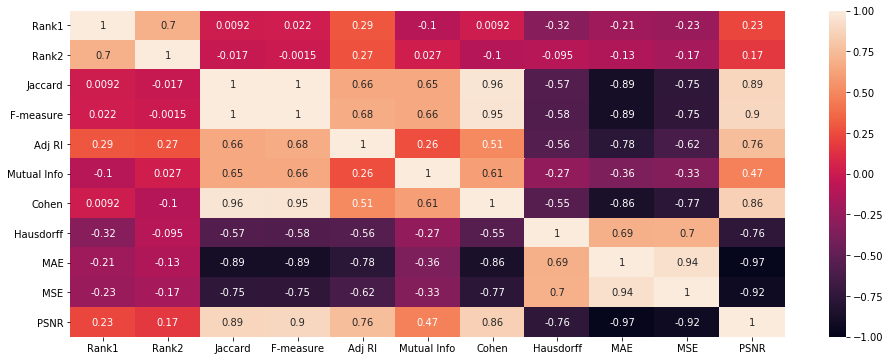

In [38]:
# Pearson correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True)


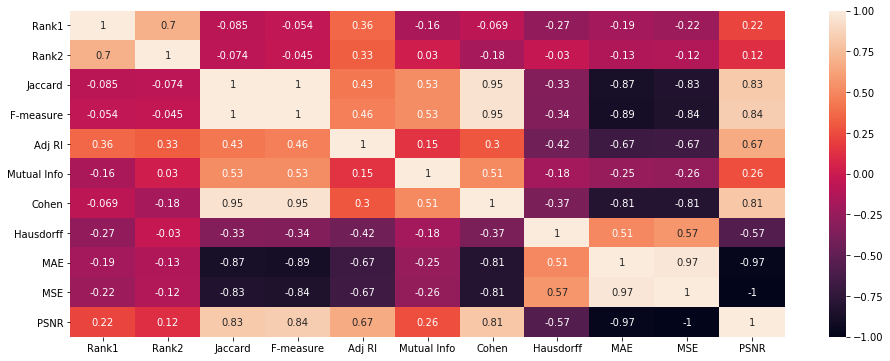

In [39]:
# Spearman correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

The metric with the highest correlation is Hausdorff Distance, followed by Adjusted Random Index.

# Bland-Altman

In [40]:
jacc = np.array(norm_df['Jaccard'])
f = np.array(norm_df['F-measure'])
adj = np.array(norm_df['Adj RI'])
mi = np.array(norm_df['Mutual Info'])
cohen = np.array(norm_df['Cohen'])
haus = np.array(norm_df['Hausdorff'])
mae = np.array(norm_df['MAE'])
mse = np.array(norm_df['MSE'])
psnr = np.array(norm_df['PSNR'])

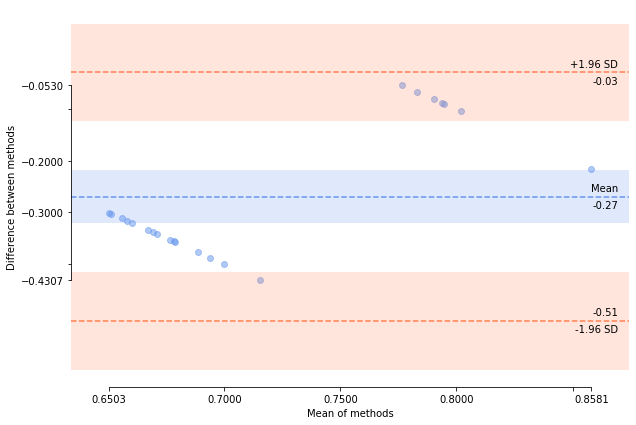

In [41]:
pc.blandAltman(norm_r1,jacc)

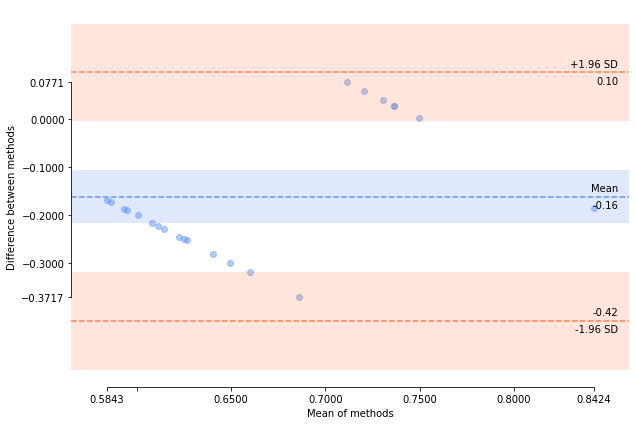

In [42]:
pc.blandAltman(norm_r1,f)

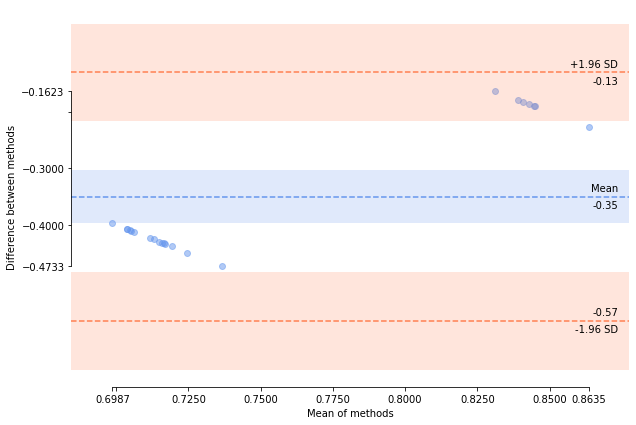

In [43]:
pc.blandAltman(norm_r1,adj)

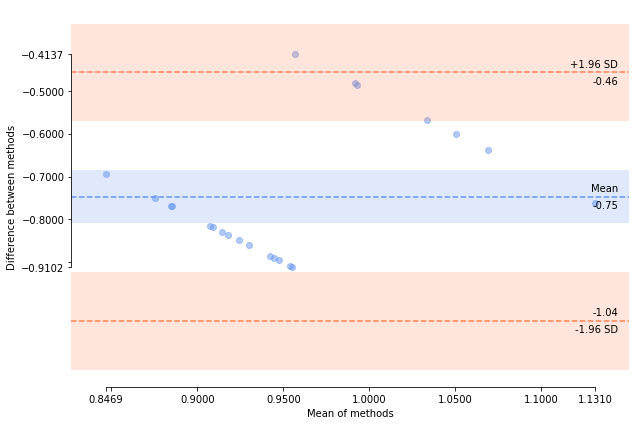

In [44]:
pc.blandAltman(norm_r1,mi)

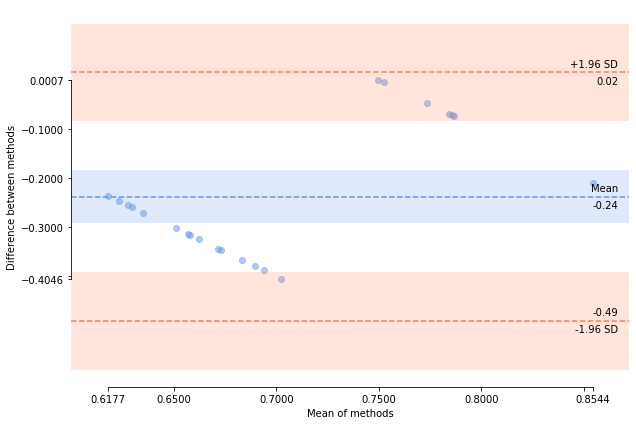

In [45]:
pc.blandAltman(norm_r1,cohen)

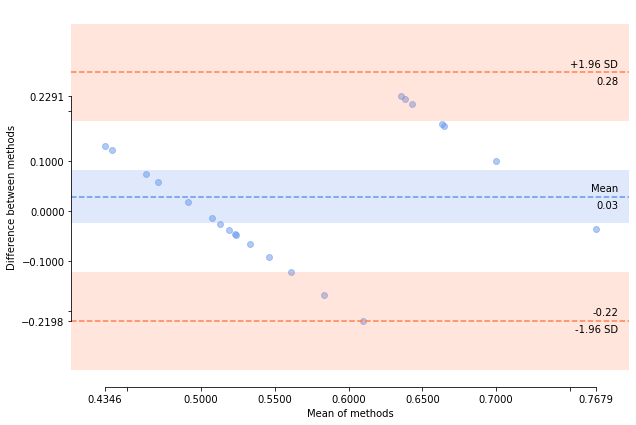

In [46]:
pc.blandAltman(norm_r1,haus)

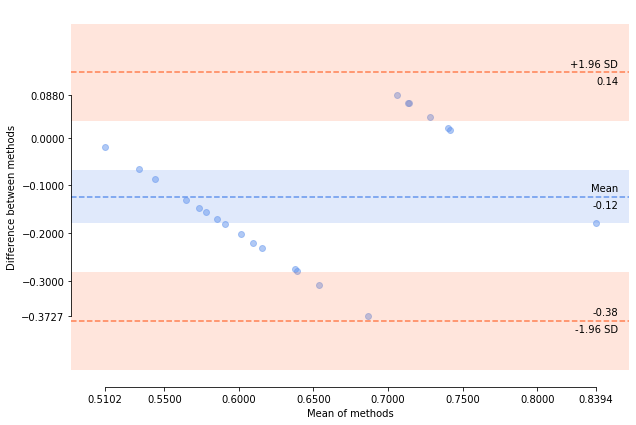

In [47]:
pc.blandAltman(norm_r1,mae)

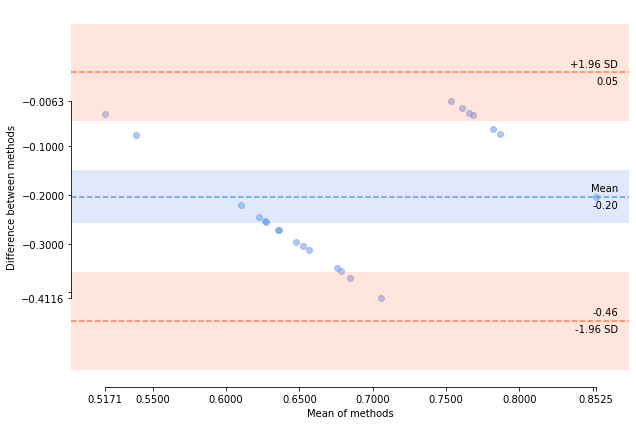

In [48]:
pc.blandAltman(norm_r1,mse)

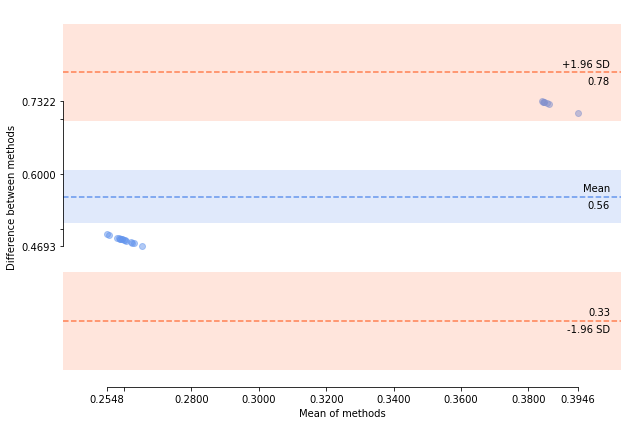

In [49]:
pc.blandAltman(norm_r1,psnr)